Random Forest

In [30]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel

# reading a CSV file directly from Web (or local drive), and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local drive:

pulsar_df = pd.read_csv('/Users/brycedebilzan/Desktop/Classes/CS4661-DATA_SCIENCE/PROJECT/pulsar_stars.csv')

# checking the dataset by printing every 10 lines:
pulsar_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [31]:
from sklearn.ensemble import RandomForestClassifier 

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

# create a python list of feature names that would like to pick from the dataset:
#feature_cols = ['Mean of the integrated profile','Standard deviation of the integrated profile','Excess kurtosis of the integrated profile',
#                'Skewness of the integrated profile','Mean of the DM-SNR curve','Standard deviation of the DM-SNR curve',
#                'Excess kurtosis of the DM-SNR curve','Skewness of the DM-SNR curve']

# change column names
pulsar_df.columns = ['Mean_of_integrated_profile', 'Standard_deviation_of_integrated profile', 'Excess_kurtosis_of_integrated_profile', 
              'Skewness_of_integrated_profile', 'Mean_of_DM-SNR_curve', 'Standard_deviation_of_DM-SNR curve', 
              'Excess_kurtosis_of_DM-SNR_curve', 'Skewness_of_DM-SNR_curve', 'target_class']

# checking the dataset by printing every 10 lines:
pulsar_df.head()

feature_cols = ['Mean_of_integrated_profile', 'Standard_deviation_of_integrated profile', 'Excess_kurtosis_of_integrated_profile', 
              'Skewness_of_integrated_profile', 'Mean_of_DM-SNR_curve', 'Standard_deviation_of_DM-SNR curve', 
              'Excess_kurtosis_of_DM-SNR_curve', 'Skewness_of_DM-SNR_curve']

# use the above list to select the features from the original DataFrame
X = pulsar_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = pulsar_df['target_class']

# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

# for training:  my_RandomForest.fit 
my_RandomForest.fit(X_train, y_train)

# for testing/prediction:  my_RandomForest.predict
y_predict_dt = my_RandomForest.predict(X_test)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparision and returns the 
# portion of correct predictions:
score_dt = accuracy_score(y_test, y_predict_dt)

# print result
print(score_dt)


0.9784517158818835


Linear Regression

In [32]:
# The following line will import LinearRegression "Class"

from sklearn.linear_model import LinearRegression

# In the following line, "my_linreg" is instantiated as an "object" of LinearRegression "class". 

my_linreg = LinearRegression()

# fitting the model to the training data:
my_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# checking coefficients

# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

-0.3233593763924819
[ 3.06176688e-03 -2.13427285e-03  4.08376520e-01 -2.86340850e-02
 -9.56926962e-04  3.11226810e-03 -8.83431345e-03  3.09393947e-04]


In [34]:
# testing and prediction stage

# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)

print(y_prediction)

[-0.03520488  0.11504079  0.14044245 ... -0.00095407 -0.00041118
  0.08044722]


In [35]:
# evalutaion for regression

from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

0.16452066239090093


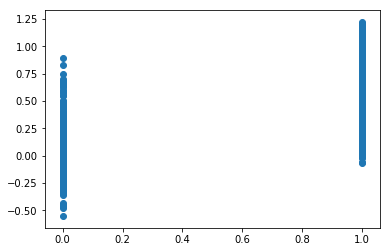

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_prediction)
plt.show()